# LIBS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# UTILS

## FUCTIONS

### GENERICS

In [2]:
def calculate_difference_days(df, column_start, colunm_1, column_2):
    list_mergedAt = []
    list_closedAt = []
    for _, row in df.iterrows():
        createdAt = row[column_start]
        mergedAt = row[colunm_1]
        closedAt = row[column_2]
        
        createdAt_obj = datetime.fromisoformat(createdAt)
        
        if not type(mergedAt) == str:
            list_mergedAt.append(None)
        else:
            mergedAt_obj = datetime.fromisoformat(mergedAt)
            diference = abs(mergedAt_obj - createdAt_obj).days
            list_mergedAt.append(diference)
            
        closedAt_obj = datetime.fromisoformat(str(closedAt))
        diference = abs(closedAt_obj - createdAt_obj).days

        list_closedAt.append(diference)
    
    return list_mergedAt, list_closedAt

### GRAFS

In [3]:
def get_values_statistics(df, column: str)-> tuple:
    """
    Calcula tres valores.
    
    Argumentos:
    df : dataframe
    y : str
        Nome da coluna a ser avaliada
        
    Retorna:
    max_value : float
        maior valor.
    min_value : float
        menor valor.
    mean_value: float
        média
    """
    
    max_value = df[column].max()
    min_value = df[column].min()
    mean_value = df[column].mean()
    
    return (max_value, min_value, mean_value)

def boxplot(df, column: str, title: str = '')-> None:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.show()

def violinplot(df, column: str, title: str = '', x_range=None)-> None:
    plt.figure(figsize=(6, 3))
    plt.violinplot(df[column], vert=False)
    plt.xlabel(column)
    plt.title(title)
    if x_range is not None:
        plt.xlim(x_range)
        
    plt.show()

def scatter_plot(df, column_x: str, column_y: str, label_x=None, label_y=None, title='Gráfico de Dispersão', x_range=None, y_range=None):
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 4))
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    
    if x_range is not None:
        plt.xlim(x_range)
    
    if y_range is not None:
        plt.ylim(y_range)
        
    plt.grid(True)
    plt.show()
    
def bar_plot(df, column_x: str, column_y: str, label_x: str=None, label_y: str=None, title: str='Gráfico de Barras')->None:
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 6))
    plt.bar(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.show()

def bar_plot_custom_intervals(data, column: str, intervals=None, interval_size=50, xlabel='Intervalos', ylabel='Contagem', title='Contagem de Valores por Intervalo'):
    
    data = data.dropna(subset=[column])
    data[column] = data[column].astype(int)

    if intervals:
        custom_intervals = pd.IntervalIndex.from_tuples(intervals)
        bins = custom_intervals
    else:
        bins = range(0, data[column].max() + interval_size, interval_size)

    intervals = pd.cut(data[column], bins=bins)
    counts = intervals.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', width=0.8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(False)
    
    for i, val in enumerate(counts):
        plt.text(i, val + 0.2, str(val), ha='center', va='bottom')
    
    plt.show()

def scatter_plot_by_group(df, column_to_groupBy: str, column_y, mapping: dict, title: str='', label_y: str = '', y_range = None)-> None:
    if label_y is None:
        label_y = column_y
        
    groups = df.groupby(column_to_groupBy)
    plt.figure(figsize=(12, 8))
    for group_name, group_values in groups:
        plt.violinplot(group_values[column_y], positions=[group_name], showmedians=True, showextrema=True)
    
    plt.xticks(ticks=list(mapping.values()), labels=list(mapping.keys()))
    
    plt.title(title)
    plt.ylim(y_range)
    plt.ylabel(label_y)
    plt.grid(False)
    plt.show()

# ANALYSIS

# TREATS 

In [4]:
data = pd.read_csv('./dataset/dados_tratados_pulRequests.csv', sep=';')
data.head(1)

,Proprietário,Repositorio,Estrelas,Título,Número,Criado em,fechado em,merge em,decisão da review,Total de Reviews,Total de arquivos,Adições,exclusões,Texto de corpo,total de participantes,total de comentários
0,freeCodeCamp,freeCodeCamp,386374.0,feat(client): add linkedIn credential id to sh...,54376.0,2024-04-12T13:46:18Z,2024-04-12T15:32:34Z,2024-04-12T15:32:34Z,APPROVED,2.0,4.0,45.0,5.0,Adds back the changes that were reverted here:...,4.0,0.0


In [5]:
print(f'Número de linhas: {data.shape[0]} - Número de colunas: {data.shape[1]} \n')
print('Total de valores vazios por colunas ')
data.isna().sum()

Número de linhas: 15248 - Número de colunas: 16 

Total de valores vazios por colunas 


Proprietário                  0
Repositorio                   0
Estrelas                  15048
Título                       49
Número                       48
Criado em                    48
fechado em                   48
merge em                   5725
decisão da review          8452
Total de Reviews             48
Total de arquivos            48
Adições                      48
exclusões                    48
Texto de corpo             2579
total de participantes       48
total de comentários         48
dtype: int64

In [6]:
data = data.dropna(subset=['Criado em'])
data = data.dropna(subset=['Título'])
data.isna().sum()

Proprietário                  0
Repositorio                   0
Estrelas                  15000
Título                        0
Número                        0
Criado em                     0
fechado em                    0
merge em                   5676
decisão da review          8403
Total de Reviews              0
Total de arquivos             0
Adições                       0
exclusões                     0
Texto de corpo             2530
total de participantes        0
total de comentários          0
dtype: int64

In [7]:
list_mergedAt, list_closedAt = calculate_difference_days(data, 'Criado em', 'merge em', 'fechado em')
data['merge em'] = list_mergedAt
data['fechado em'] = list_closedAt 
data['nº caracteres no body'] = [len(str(body)) for body in data['Texto de corpo']] 
data.head(2)     

,Proprietário,Repositorio,Estrelas,Título,Número,Criado em,fechado em,merge em,decisão da review,Total de Reviews,Total de arquivos,Adições,exclusões,Texto de corpo,total de participantes,total de comentários,nº caracteres no body
0,freeCodeCamp,freeCodeCamp,386374.0,feat(client): add linkedIn credential id to sh...,54376.0,2024-04-12T13:46:18Z,0,0.0,APPROVED,2.0,4.0,45.0,5.0,Adds back the changes that were reverted here:...,4.0,0.0,339
1,freeCodeCamp,freeCodeCamp,297507.0,"Revert ""feat(client): add linkedIn credential ...",54373.0,2024-04-12T10:20:47Z,0,0.0,APPROVED,2.0,4.0,5.0,45.0,This reverts commit 5596268.\r\nSee: #54346 (c...,3.0,1.0,465


In [8]:
mapping_decisao = {'APPROVED': 0, 'REVIEW_REQUIRED': 1, 'CHANGES_REQUESTED': 2}
data['decisao_review_numerica'] = data['decisão da review'].map(mapping_decisao)

## GRAFH

### RQ 01. Qual a relação entre o tamanho dos PRs e o feedback final das revisões?

In [9]:
data.columns

Index(['Proprietário', 'Repositorio', 'Estrelas', 'Título', 'Número',
       'Criado em', 'fechado em', 'merge em', 'decisão da review',
       'Total de Reviews', 'Total de arquivos', 'Adições', 'exclusões',
       'Texto de corpo', 'total de participantes', 'total de comentários',
       'nº caracteres no body', 'decisao_review_numerica'],
      dtype='object')

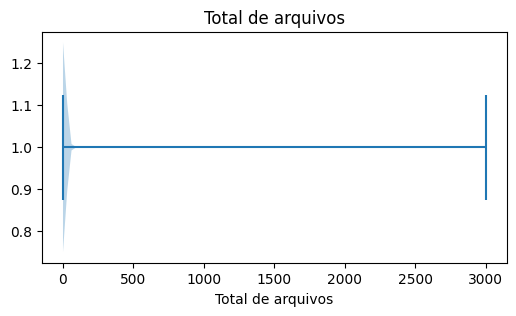

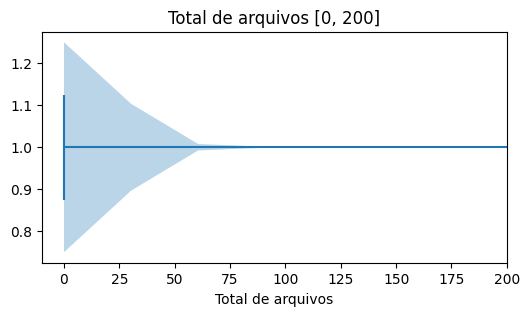

In [10]:
# Tamanho: número de arquivos; total de linhas adicionadas e removidas.
violinplot(data, 'Total de arquivos', title='Total de arquivos')
violinplot(data, 'Total de arquivos', title='Total de arquivos [0, 200]', x_range=(-10, 200))

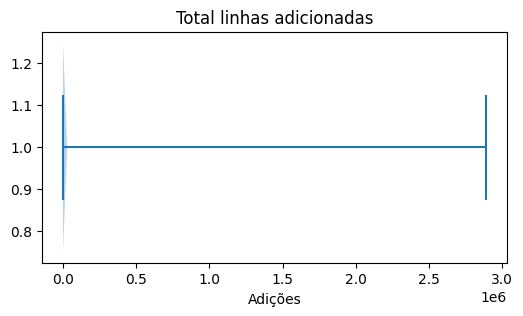

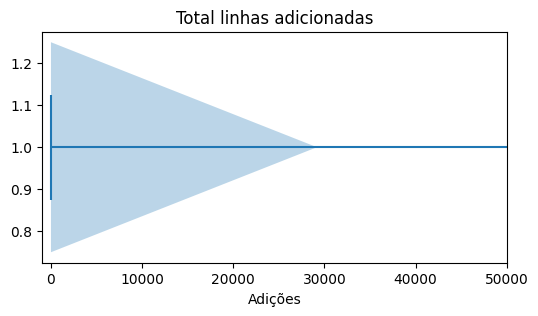

In [11]:
violinplot(data, 'Adições', title='Total linhas adicionadas')
violinplot(data, 'Adições', title='Total linhas adicionadas', x_range=(-1000, 50000))

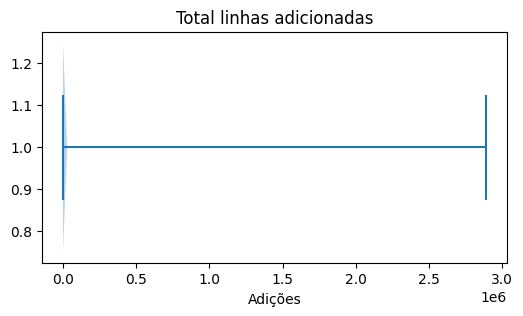

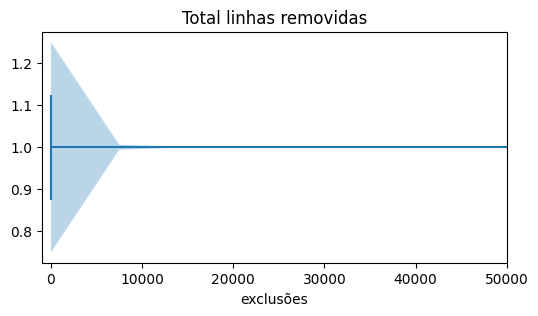

In [12]:
violinplot(data, 'Adições', title='Total linhas adicionadas')
violinplot(data, 'exclusões', title='Total linhas removidas', x_range=(-1000, 50000))

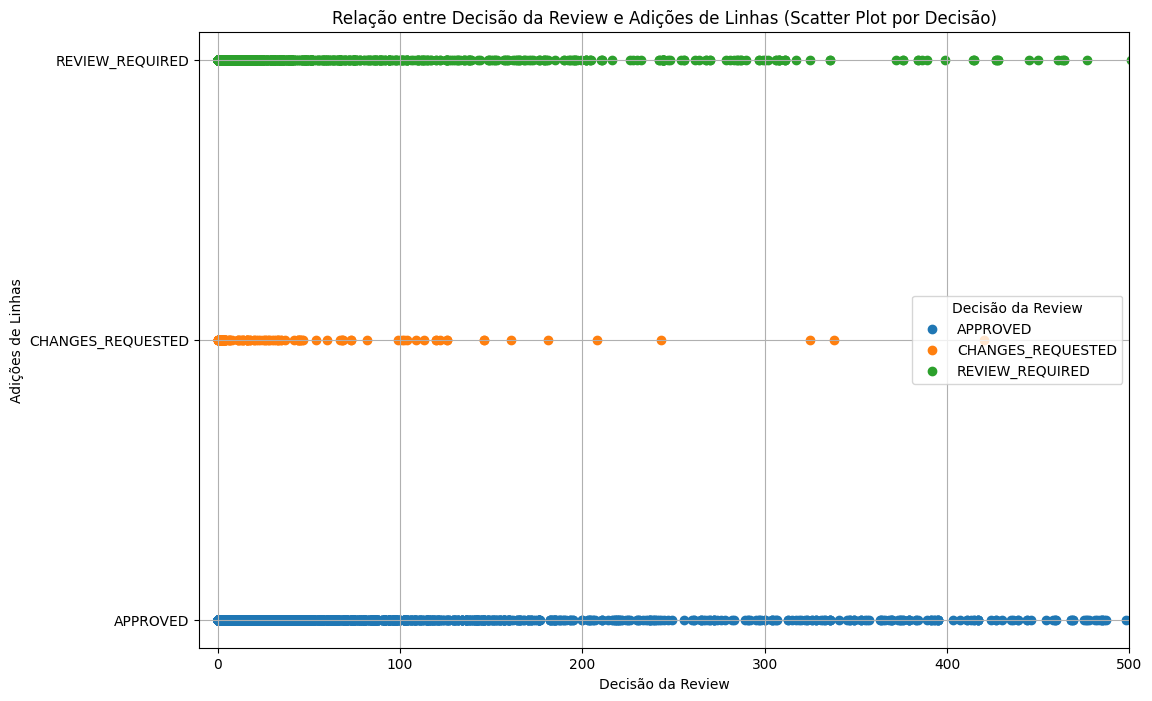

In [13]:
grupos_decisao = data.groupby('decisão da review')

# Plotando um gráfico de dispersão para cada grupo
plt.figure(figsize=(12, 8))
for decisao, grupo in grupos_decisao:
    plt.scatter(grupo['Adições'], grupo['decisão da review'],label=decisao)

plt.title('Relação entre Decisão da Review e Adições de Linhas (Scatter Plot por Decisão)')
plt.xlabel('Decisão da Review')
plt.ylabel('Adições de Linhas')
plt.legend(title='Decisão da Review')
plt.xlim((-10, 500))
plt.grid()
plt.show()

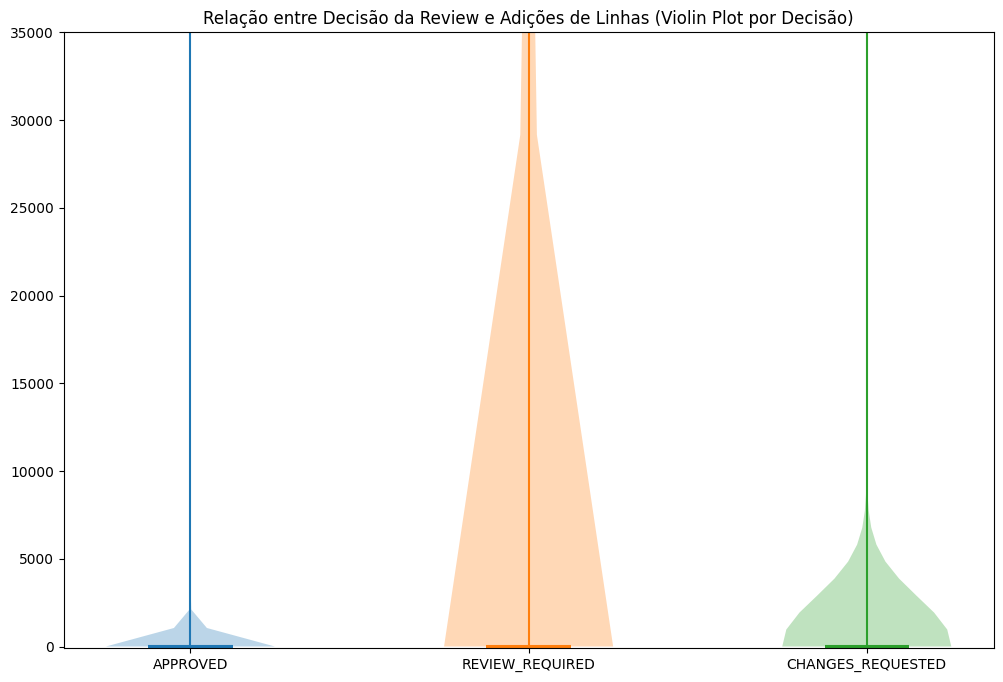

In [14]:
mapping_decison = {'APPROVED': 0, 'REVIEW_REQUIRED': 1, 'CHANGES_REQUESTED': 2}

scatter_plot_by_group(data,'decisao_review_numerica', 'Adições', mapping=mapping_decison, title='Relação entre Decisão da Review e Adições de Linhas (Violin Plot por Decisão)', y_range=(-100, 35000) )

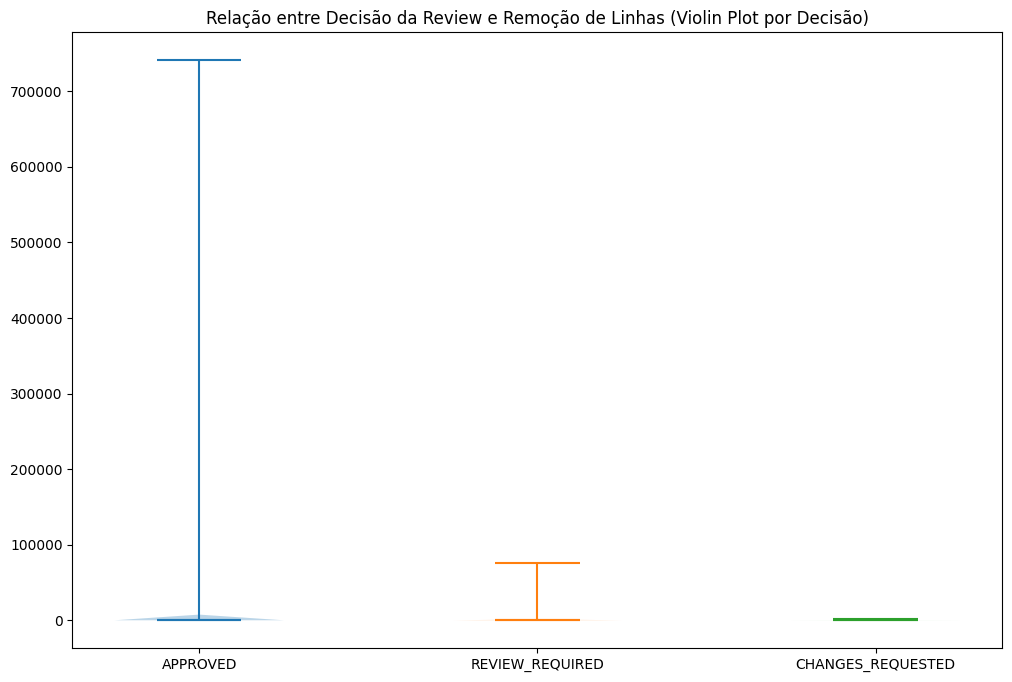

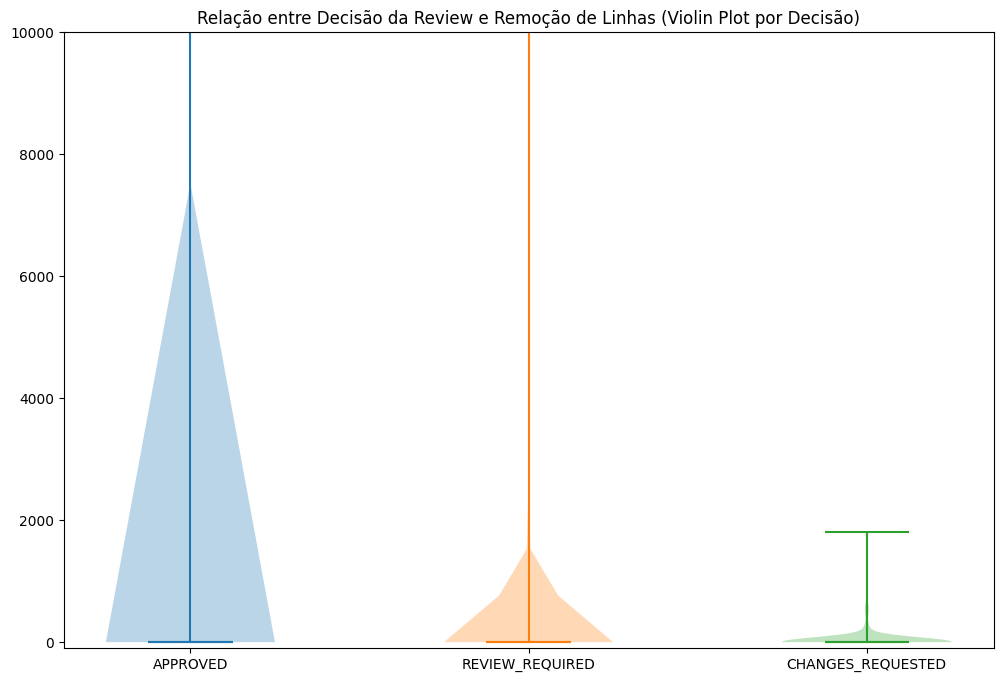

In [15]:
scatter_plot_by_group(data,'decisao_review_numerica', 'exclusões', mapping=mapping_decison, title='Relação entre Decisão da Review e Remoção de Linhas (Violin Plot por Decisão)' )
scatter_plot_by_group(data,'decisao_review_numerica', 'exclusões', mapping=mapping_decison, title='Relação entre Decisão da Review e Remoção de Linhas (Violin Plot por Decisão)', y_range=(-100, 10000) )

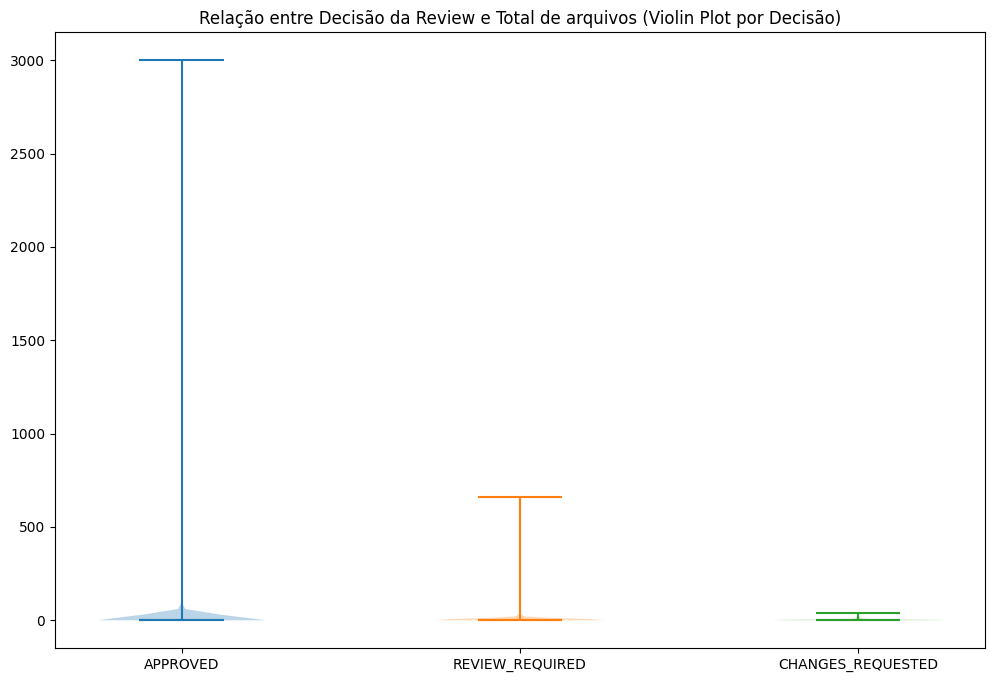

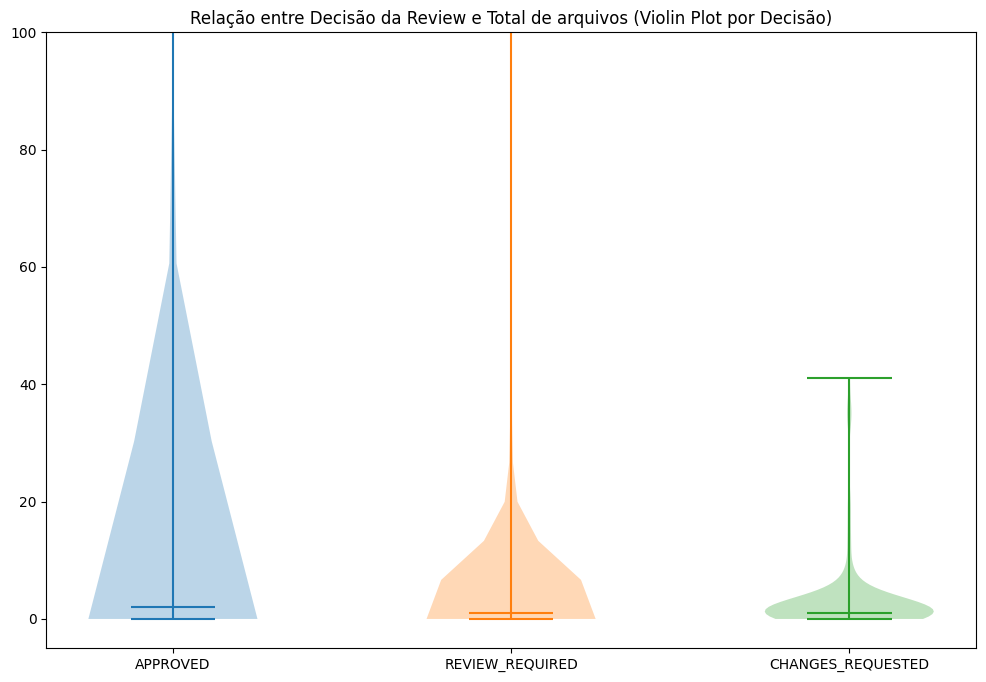

In [16]:
scatter_plot_by_group(data,'decisao_review_numerica', 'Total de arquivos', mapping=mapping_decison, title='Relação entre Decisão da Review e Total de arquivos (Violin Plot por Decisão)' )
scatter_plot_by_group(data,'decisao_review_numerica', 'Total de arquivos', mapping=mapping_decison, title='Relação entre Decisão da Review e Total de arquivos (Violin Plot por Decisão)', y_range=(-5, 100) )

In [17]:
data['decisão da review'].unique()

array(['APPROVED', 'REVIEW_REQUIRED', 'CHANGES_REQUESTED', nan],
      dtype=object)

### RQ 02. Qual a relação entre o tempo de análise dos PRs e o feedback final das revisões?

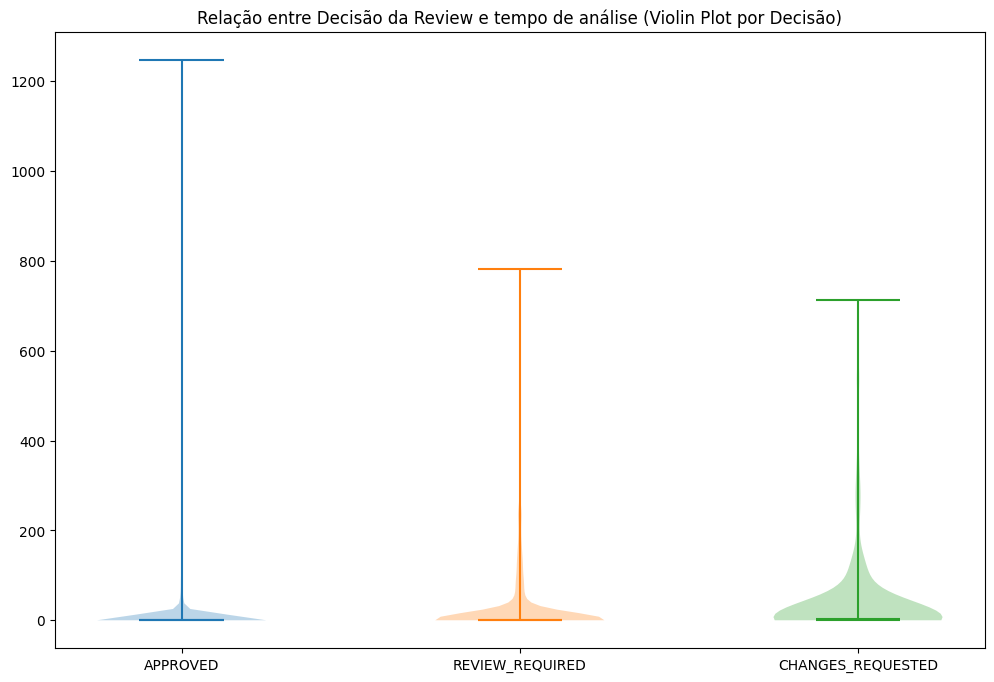

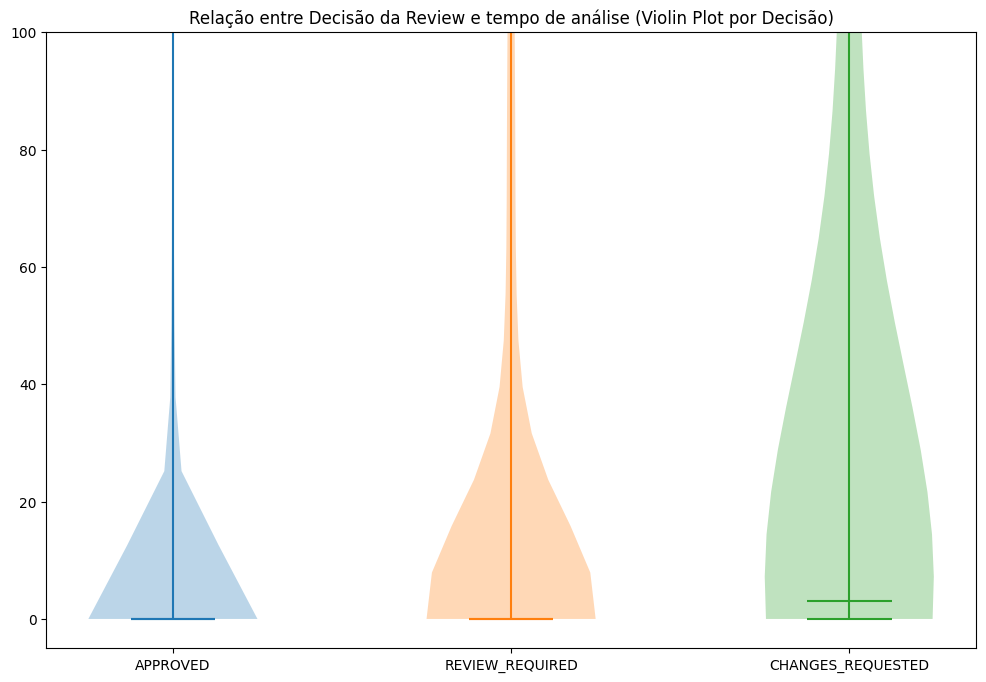

In [18]:
scatter_plot_by_group(data,'decisao_review_numerica', 'fechado em', mapping=mapping_decison, title='Relação entre Decisão da Review e tempo de análise (Violin Plot por Decisão)' )
scatter_plot_by_group(data,'decisao_review_numerica', 'fechado em', mapping=mapping_decison, title='Relação entre Decisão da Review e tempo de análise (Violin Plot por Decisão)', y_range=(-5, 100) )

### RQ 03. Qual a relação entre a descrição dos PRs e o feedback final das revisões?

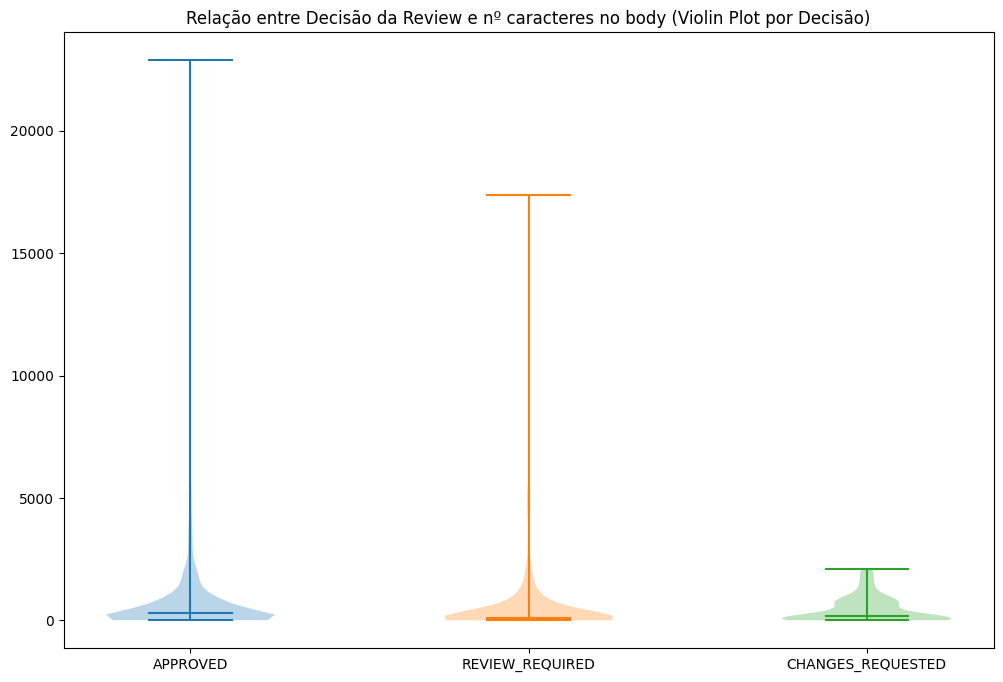

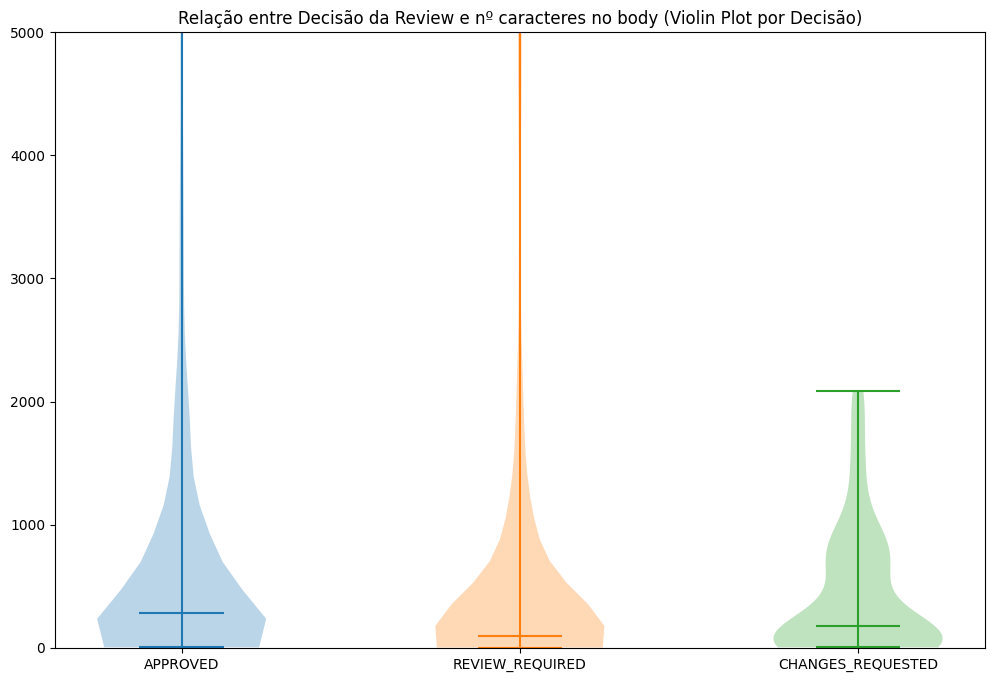

In [19]:
scatter_plot_by_group(data,'decisao_review_numerica', 'nº caracteres no body', mapping=mapping_decison, title='Relação entre Decisão da Review e nº caracteres no body (Violin Plot por Decisão)' )
scatter_plot_by_group(data,'decisao_review_numerica', 'nº caracteres no body', mapping=mapping_decison, title='Relação entre Decisão da Review e nº caracteres no body (Violin Plot por Decisão)', y_range=(-5, 5000) )

### RQ 04. Qual a relação entre as interações nos PRs e o feedback final das revisões?

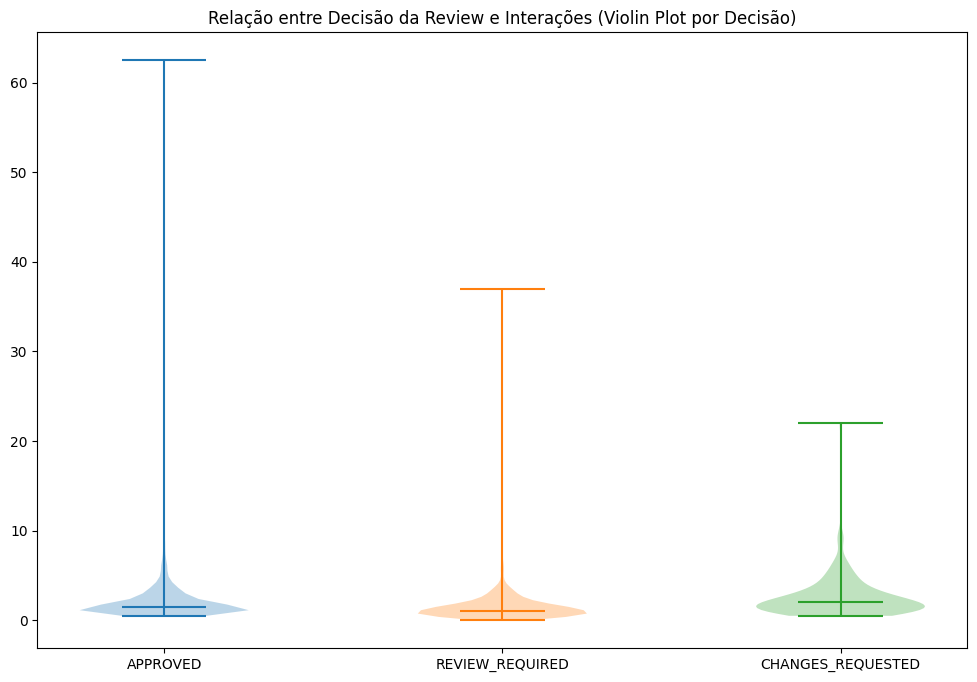

In [20]:
data['Interações'] = (data['total de participantes'] + data['total de comentários']) / 2
scatter_plot_by_group(data,'decisao_review_numerica', 'Interações', mapping=mapping_decison, title='Relação entre Decisão da Review e Interações (Violin Plot por Decisão)' )

### RQ 05. Qual a relação entre o tamanho dos PRs e o número de revisões realizadas?

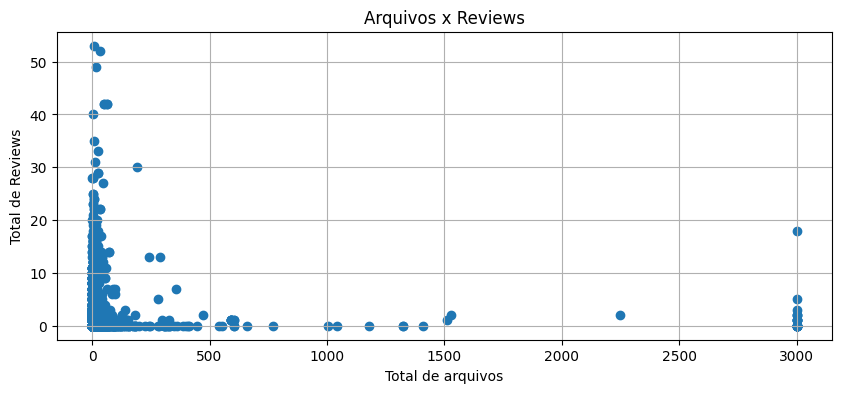

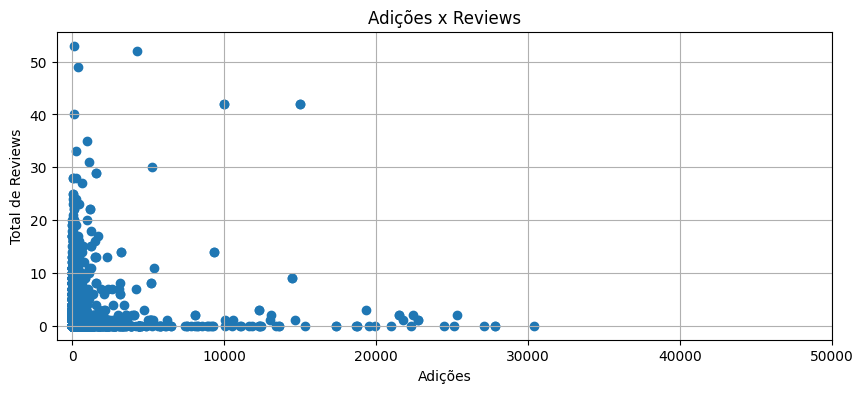

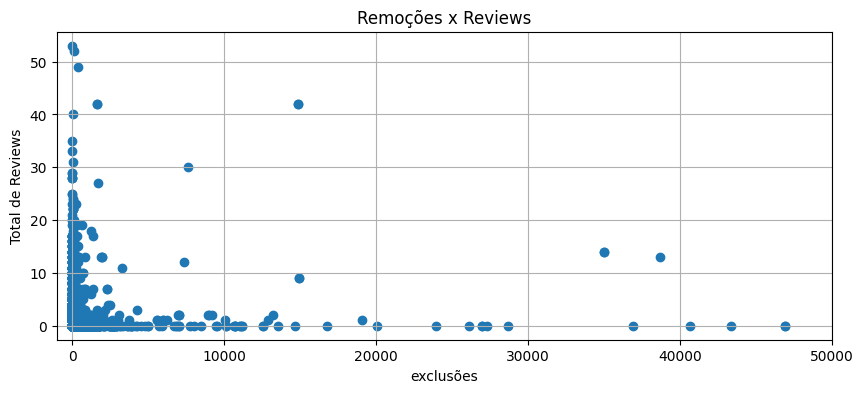

In [21]:
scatter_plot(data, column_x='Total de arquivos', column_y='Total de Reviews', title='Arquivos x Reviews')
scatter_plot(data, column_x='Adições', column_y='Total de Reviews', x_range=(-1000,50000), title='Adições x Reviews')
scatter_plot(data, column_x='exclusões', column_y='Total de Reviews', x_range=(-1000,50000), title='Remoções x Reviews')

### RQ 06. Qual a relação entre o tempo de análise dos PRs e o número de revisões realizadas?

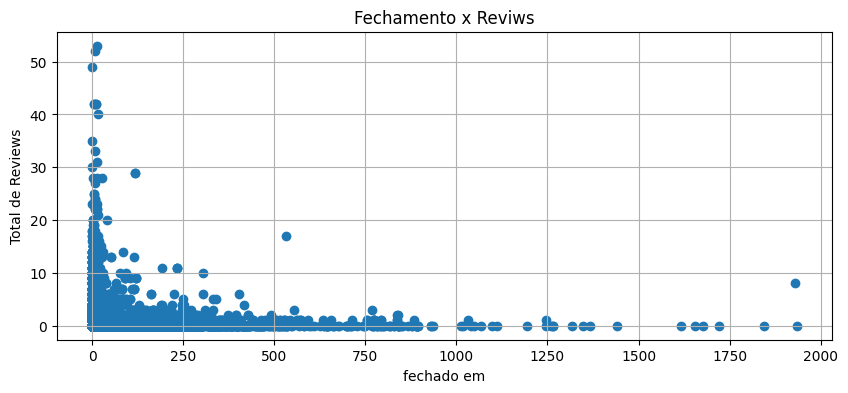

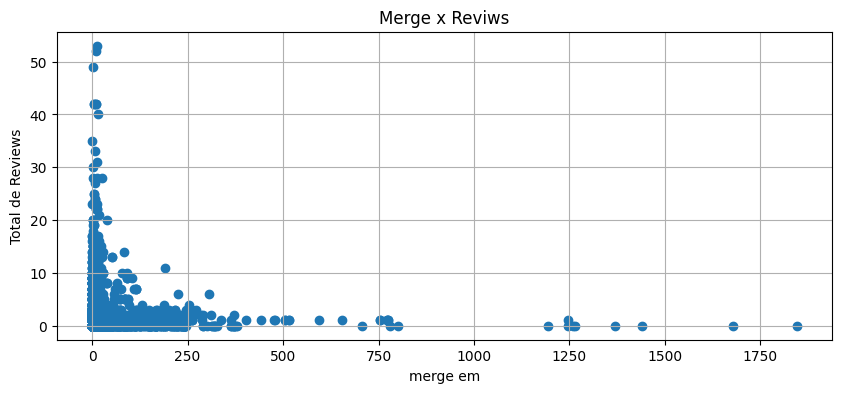

In [22]:
scatter_plot(data, column_x='fechado em', column_y='Total de Reviews', title='Fechamento x Reviws')
scatter_plot(data, column_x='merge em', column_y='Total de Reviews', title='Merge x Reviws')

### RQ 07. Qual a relação entre a descrição dos PRs e o número de revisões realizadas?

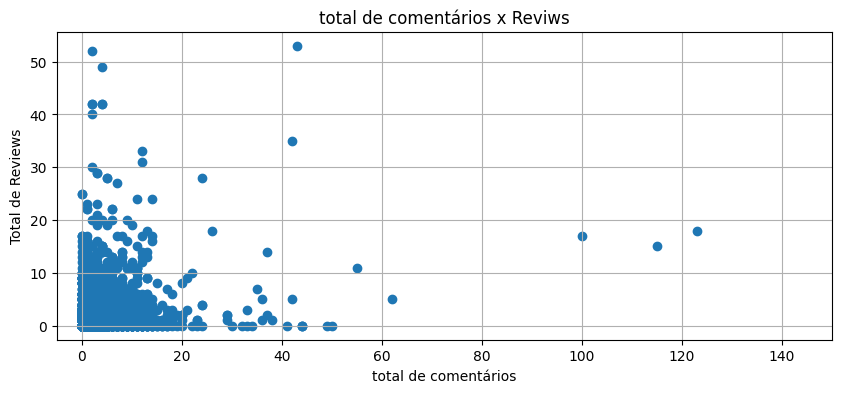

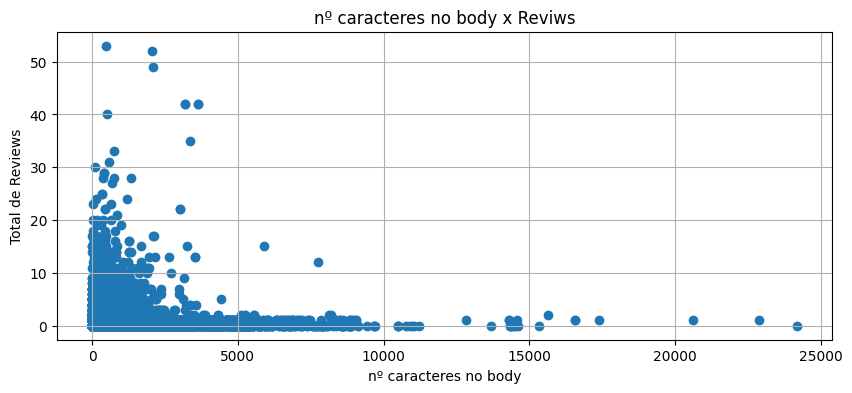

In [23]:
scatter_plot(data, column_x='total de comentários', column_y='Total de Reviews', title='total de comentários x Reviws', x_range=(-5, 150))
scatter_plot(data, column_x='nº caracteres no body', column_y='Total de Reviews', title='nº caracteres no body x Reviws')

### RQ 08. Qual a relação entre as interações nos PRs e o número de revisões realizadas?

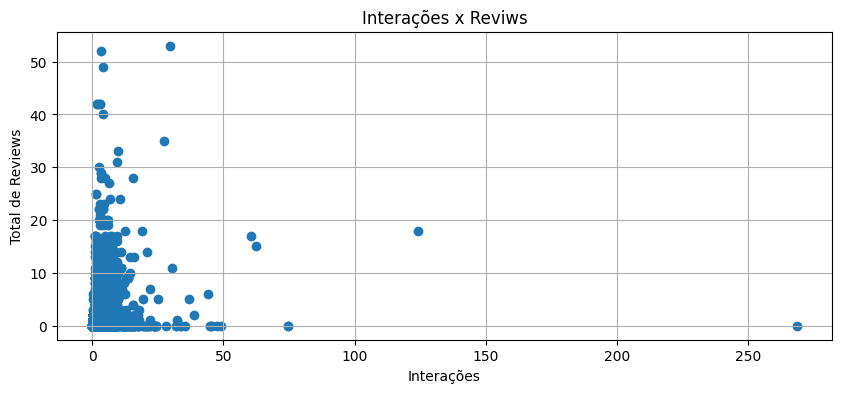

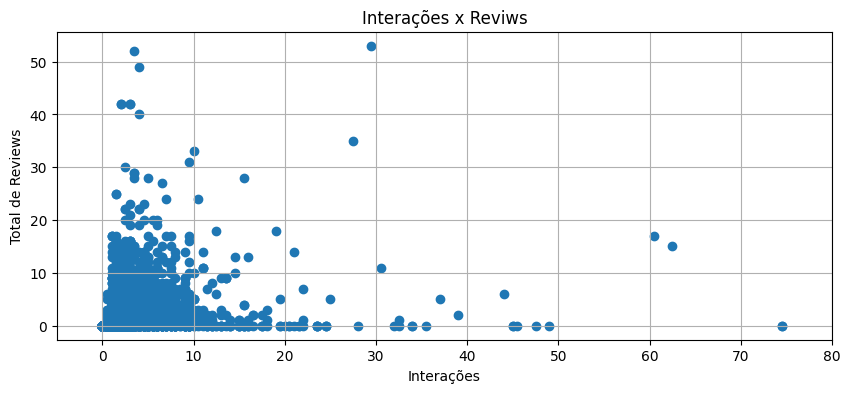

In [24]:
scatter_plot(data, column_x='Interações', column_y='Total de Reviews', title='Interações x Reviws')
scatter_plot(data, column_x='Interações', column_y='Total de Reviews', title='Interações x Reviws', x_range=(-5, 80))